# Week4 - Homework_GI67216

- Execute the below code, then answer the numbered questions.



### study reference ↴
https://www.w3schools.com/python/ <br>
https://scikit-learn.org/stable/getting_started/

In [12]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer



In [13]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [14]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


In [15]:
df.head()

,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [16]:
# insert code here

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()


print("Numeric Cols :",numeric_cols)
print("Categorical Cols :",categorical_cols)


numeric_df = df[numeric_cols]
cat_df = df[categorical_cols]
numeric_df,cat_df

Numeric Cols : ['condition', 'odometer', 'auction_value', 'selling_price']
Categorical Cols : ['make', 'transmission', 'state']


(      condition  odometer  auction_value  selling_price
 0           4.8       NaN        14350.0        13600.0
 1           3.7   29398.0        17600.0        17100.0
 2           3.2   32180.0        19100.0        17600.0
 3           NaN   30798.0        11950.0        10700.0
 4           2.8   29526.0        28000.0        26100.0
 ...         ...       ...            ...            ...
 9050        4.2   41186.0            NaN        11600.0
 9051        NaN   38810.0        16250.0        17300.0
 9052        4.7    4551.0        12500.0        13800.0
 9053        4.6   33114.0        21800.0        27000.0
 9054        3.7   23776.0        28800.0        29800.0
 
 [9055 rows x 4 columns],
         make transmission state
 0     nissan    automatic    md
 1       ford    automatic    mo
 2       ford    automatic    fl
 3     nissan    automatic    ca
 4       ford    automatic    nj
 ...      ...          ...   ...
 9050     NaN    automatic    il
 9051    ford    automat

## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [6]:
# insert code here

# I have Define the numeric pipeline here....
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# I have Applied the pipeline to the numeric_df....
transformed_numeric_data = numeric_pipeline.fit_transform(numeric_df)

print(transformed_numeric_data)


[[ 1.33305878 -0.18533584 -0.19118532 -0.28259296]
 [-0.08100654 -0.41098549  0.2490203   0.15990885]
 [-0.72376351 -0.31410936  0.45219212  0.2231234 ]
 ...
 [ 1.20450738 -1.27621957 -0.44176391 -0.25730714]
 [ 1.07595599 -0.28158517  0.81790141  1.41155684]
 [-0.08100654 -0.60675746  1.76603659  1.76555829]]


#
# Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [20]:
# insert code here

# I have defined the categorical pipeline without dropping the first category....
categoric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# I have Applied the pipeline to the cat_df....
encoded_data = categoric_pipeline.fit_transform(cat_df).toarray()


#here droped the first column for each category....
categories = categoric_pipeline.named_steps['onehot'].categories_
columns_to_drop = [0]                 # Assuming the first column is the first category of the fisrt feature......
for category_list in categories[:-1]:
    columns_to_drop.append(columns_to_drop[-1] + len(category_list))
    

# and droped columns here....
transformed_categorical_data = np.delete(encoded_data, columns_to_drop, axis=1)

print("Transformed CATEGORICAL Data Shape:  ", transformed_categorical_data.shape)



Transformed CATEGORICAL Data Shape:   (9055, 41)


## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [22]:
# insert code here

# here I have Combine the numeric and categorical pipelines....
pre_processor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categoric_pipeline, categorical_cols)
    ])

# For demonstration: Apply the combined pipeline to the full DataFrame
# Assuming the full DataFrame is named `df`
df_combined = pd.concat([numeric_df, cat_df], axis=1)
transformed_data = pre_processor.fit_transform(df_combined)

print("TRANSFORMED Data Shape: ", transformed_data.shape)


TRANSFORMED Data Shape:  (9055, 48)


## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [24]:
# Extend the data processing pipeline with a linear regression model
full_pipeline = Pipeline(steps=[
    ('pre_processor', pre_processor),
    ('model', LinearRegression())
])


# Assuming you have a target variable named `y`
X_train, X_test, y_train, y_test = train_test_split(df_combined, y, test_size=0.2, random_state=42)
full_pipeline.fit(X_train, y_train)
r2_score = full_pipeline.score(X_test, y_test)
print("R^2  value on the test data:", r2_score)


R^2  value on the test data: 0.9999999999756931


## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

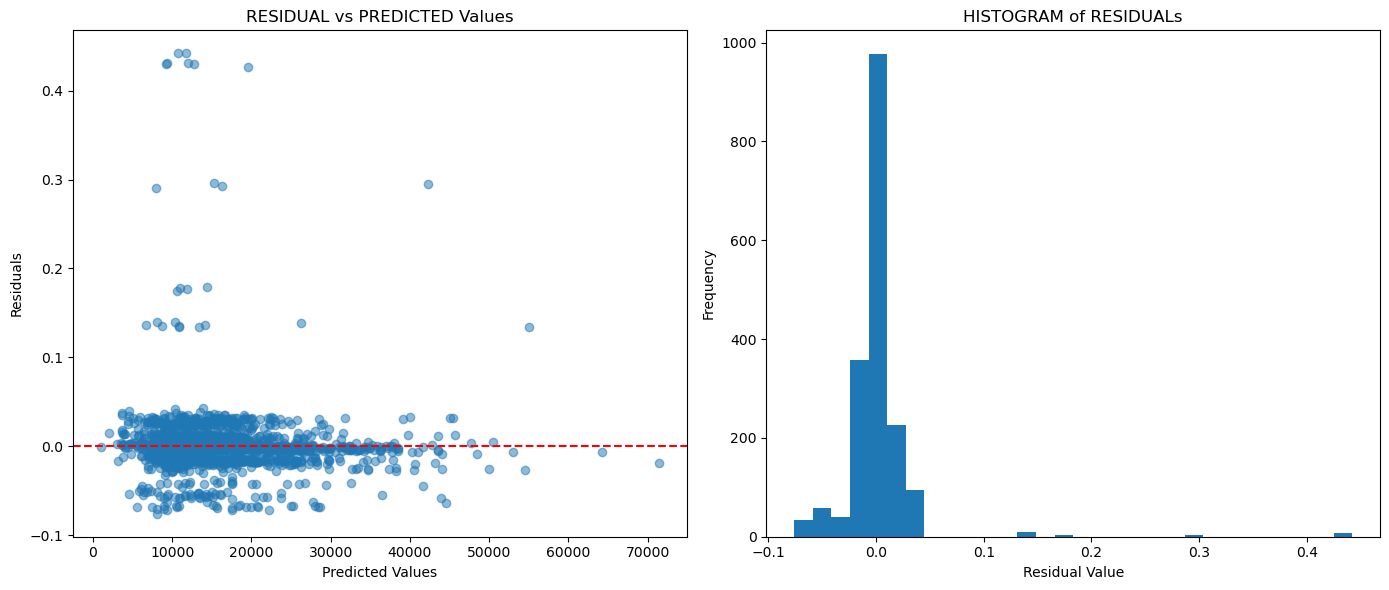

In [26]:
# insert code here
y_pred = full_pipeline.predict(X_test)
residuals = y_test - y_pred

# here tried to use Scatter plot for predicted values vs residuals....
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('RESIDUAL vs PREDICTED Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')

# and histogram fro Histogram of residuals also....
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30)
plt.title('HISTOGRAM of RESIDUALs')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Insert description here.

### Conclusion:
histogram of residuals appears to be roughly normally distributed, that's a good sign. It indicates that the model's errors (residuals) are random and don't have a systematic bias.

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [28]:
# here i modified the pipeline to use Ridge Regression....
ridge_pipeline = Pipeline(steps=[
    ('pre_processor', pre_processor),
    ('model', Ridge(alpha=100))
])

# here fitted the ridge pipeline to the training data...
ridge_pipeline.fit(X_train, y_train)

# evaluation on test data....
r2_score_ridge = ridge_pipeline.score(X_test, y_test)
print("R^2 using RIDGE Regression fro test data:", r2_score_ridge)


R^2 using RIDGE Regression fro test data: 0.9989488851922927


### sample narrative :
while the Ridge Regression model has a slightly lower  R2 score on this dataset, it might perform better on new, unseen data due to its regularization. It's also a safer choice in situations where the data might have multicollinearity. 